# No bullshit guide to Quantum Mechanics

## Axiomas e definições

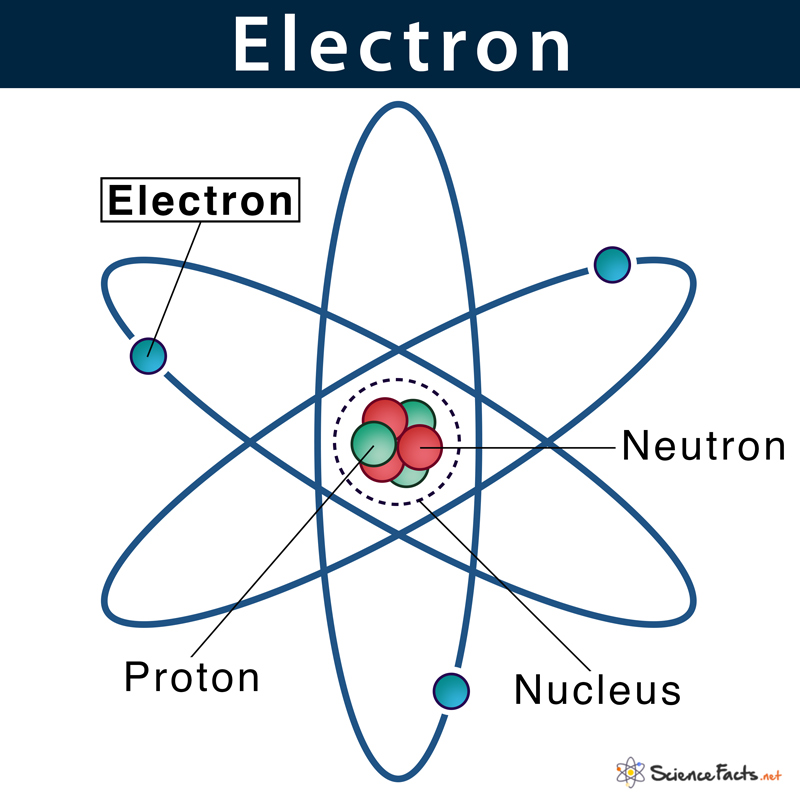

1. O *spin* de um elétron, ou melhor, o resultado da medição do spin de um elétron, é $-1$ ou $+1$ e *não existe* um terceiro caso
2. Podemos "preparar" um elétron para que seu spin assuma um valor específico
3. O resultado da medição do spin depende da orientação do "aparato" que utilizarmos para fazer a medição  
  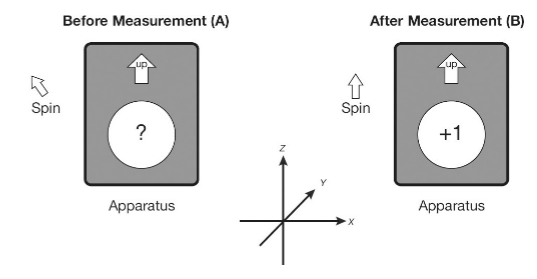
  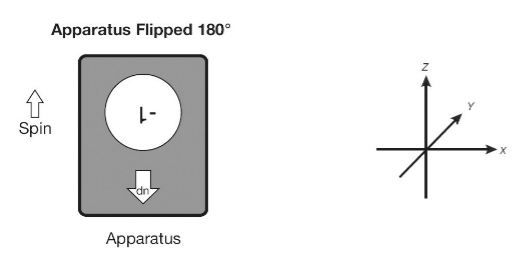

Vamos fazer um experimento?
O que você espera que aconteça caso deixemos o "aparato" perpendicular à medição do elétron?

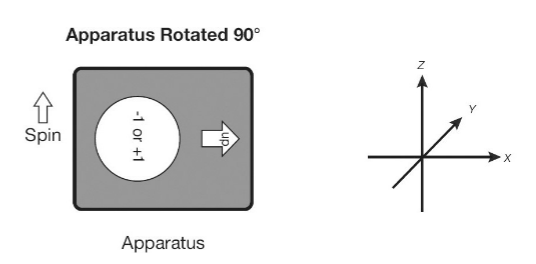

Surpresa: $50 \%$ de medições $+1$ e $50 \%$ de medições $-1$!

Agora que você entendeu como é esse "aparato", esqueça-o, há uma maneira melhor de manipular qubits!

## bra-kets

4. Um qubit é uma abstração de um elétron
5. *Todos os estados de um qubit podem ser representados em um espaço de Hilbert bidimensional*
6. Um *ket* é um column-vector $\lvert \phi \rangle \in \mathbb{C}^2$
7. Um *bra* é um row-vector $\langle \phi \rvert \in \mathbb{C}^2$
8. $\langle B \vert A \rangle$ é o *inner product* de $\langle B \rvert$ e $\lvert A \rangle$
9. Se $$\lvert A \rangle = \begin{bmatrix} a_1 \\ a_2 \end{bmatrix}$$ então $$\langle A \rvert = \begin{bmatrix} a_1^\ast \ a_2^\ast \end{bmatrix}$$
10. A probabilidade de obter um resultado $\lvert x \rangle$ em um estado $\lvert \psi \rangle$ é $$p(\lvert x\rangle) = | \langle x \vert \psi \rangle|^2$$

Assim como em espaços vetoriais $\mathbb{R}^n$, no espaço de Hilbert $\mathbb{C}^2$ há bases ortogonais, que geralmente são denotadas por $\lvert 0 \rangle$ e $\lvert 1 \rangle$

## Quantum computing

### Gates

Vamos relembrar as portas lógicas?

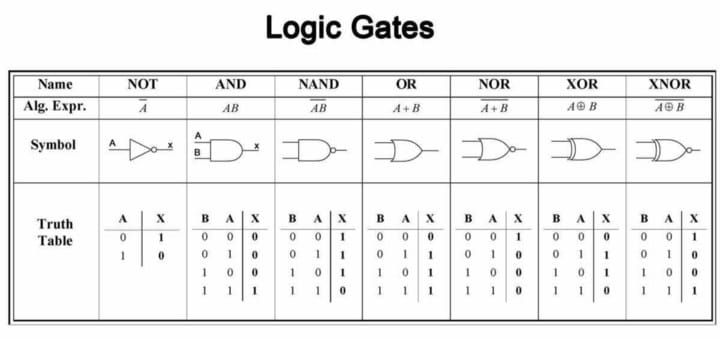

Agora temos um problema: como transformar as operações booleanas, em operações *lineares*?  
Simples: matrizes!  
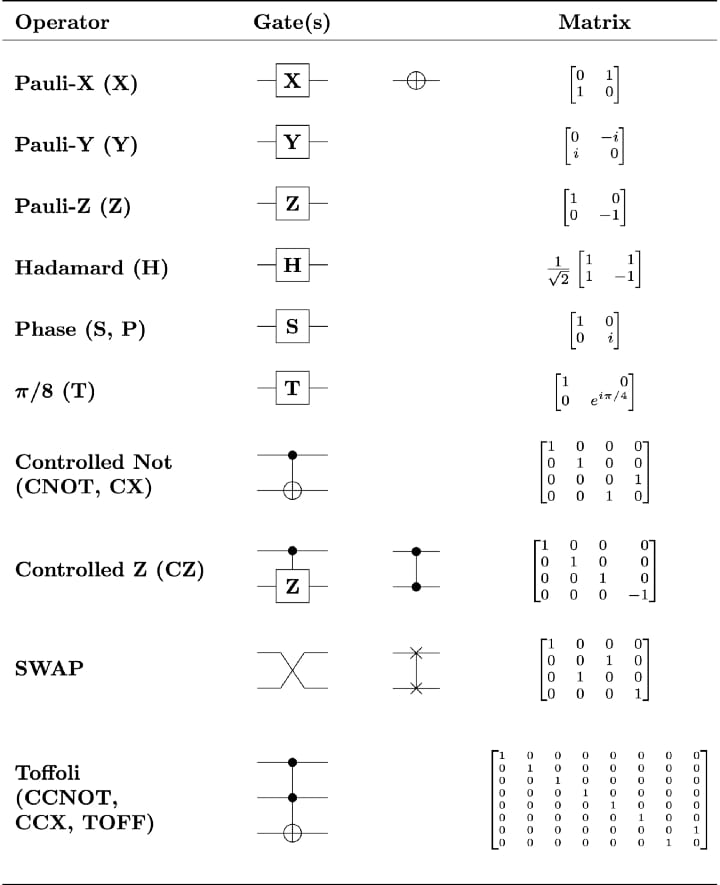

Que tal um outro experimento?

### Superposição

In [1]:
from qiskit import Aer, QuantumCircuit, assemble, transpile
from qiskit.visualization import array_to_latex, plot_histogram

In [2]:
simulator = Aer.get_backend('aer_simulator')

Agora você deve estar se perguntando, por que vetores se os reultados são simples números, eu vou te dizer: descubra por si mesmo!

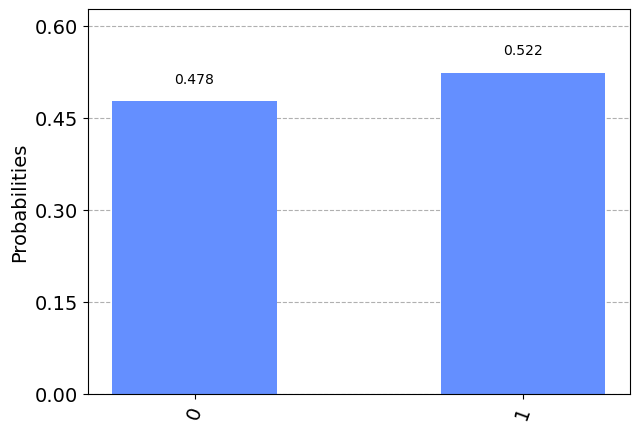

In [3]:
h0 = QuantumCircuit(1, 1)
h0.h(0) # q0 = H(|0>)
h0.measure(0, 0)
h0.draw('mpl')
counts = simulator.run(h0).result().get_counts()
plot_histogram(counts)

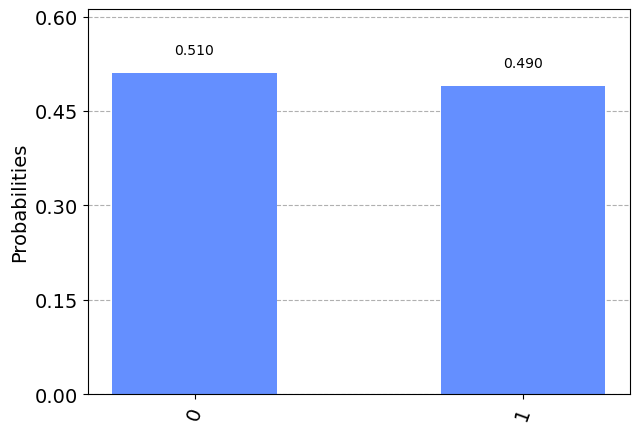

In [4]:
h1 = QuantumCircuit(1, 1)
h1.x(0) # q0 = X(|0>) = |1>
h1.h(0) # q0 = H(q0)
h1.measure(0, 0)
h1.draw('mpl')
counts = simulator.run(h1).result().get_counts()
plot_histogram(counts)

Caso aplicarmos a operação de Hadamard os resultados continuarão sendo aleatórios, certo? Certo... ?

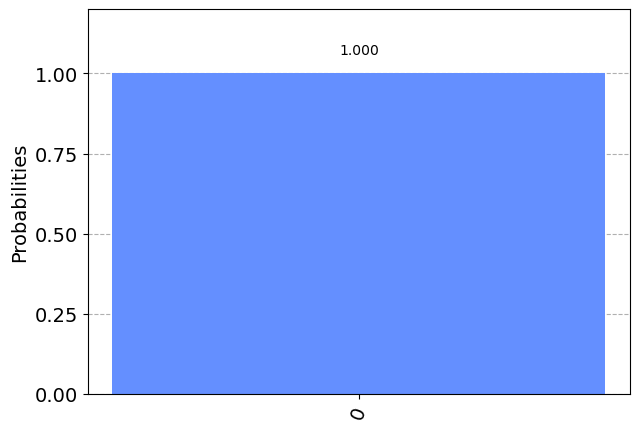

In [5]:
hh0 = QuantumCircuit(1, 1)
hh0.h(0) # q0 = H(|0>)
hh0.h(0) # q0 = H(q0)
hh0.measure(0, 0)
hh0.draw('mpl')
counts = simulator.run(hh0).result().get_counts()
plot_histogram(counts)

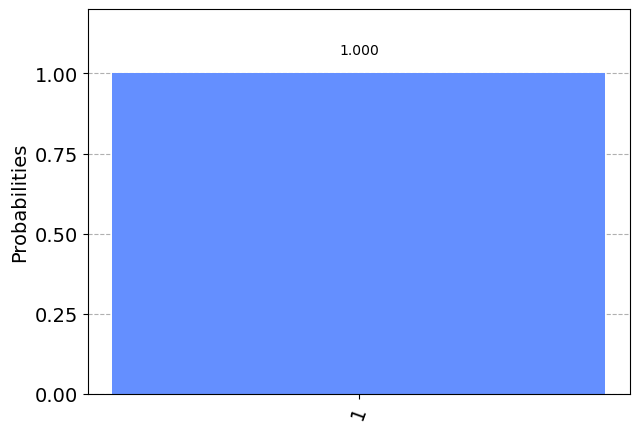

In [6]:
hh1 = QuantumCircuit(1, 1)
hh1.x(0) # q0 = X(|0>) = |1>
hh1.h(0) # q0 = H(q0)
hh1.h(0) # q0 = H(q0)
hh1.measure(0, 0)
hh1.draw('mpl')
counts = simulator.run(hh1).result().get_counts()
plot_histogram(counts)

Resultados bem interessantes, não?

### Como surgiu a mecânica quântica?

Você deve estar pensando: como raios alguém conseguiu pensar nisso?  
A resposta está em 3 fenômenos que não podem ser explicados pela relatividade geral:
- principle of uncertainty
- entanglement
- wave-particle duality

O primeiro fenômeno é bem interessante: é *impossível* saber a posição de um elétron e o seu momento ("velocidade") ao mesmo tempo!  
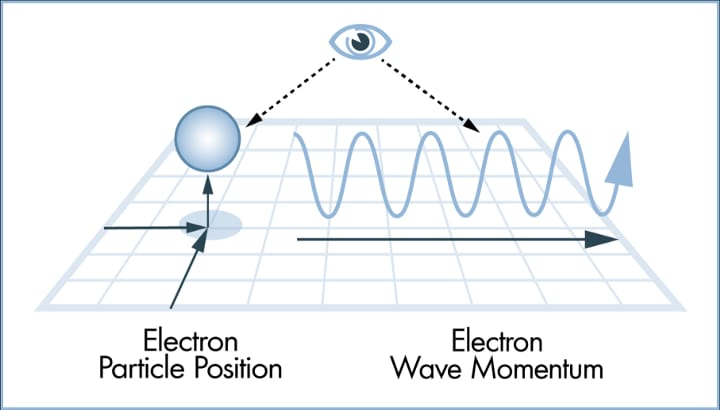

O segundo fenômeno também é interessante: se 2 partículas forem "interligadas" e separadas por kilometros de distância, quando medirmos o spin de uma saberemos com certeza qual é o spin da outra! Caso você ache isso intuitivo, acredite, não é (note que o spin que um elétron muda com interferência externa).

O terceiro fenômeno, novamente, também é interessante: certas partículas se comportam tanto como ondas quanto como ... partículas!
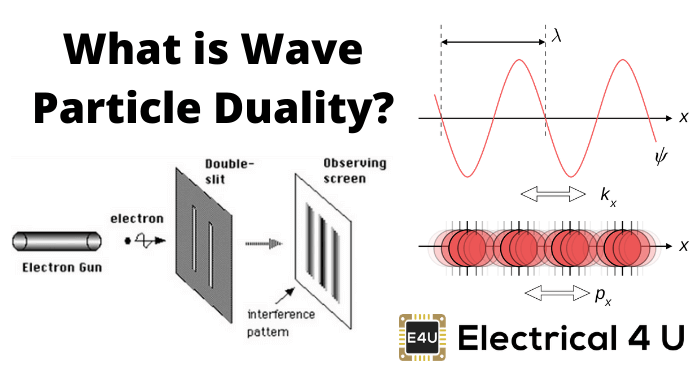

### Entanglement

Como representar um circuito com vários qubits? Assim:
$$\lvert A \rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}$$

$$\lvert B \rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix}$$

$$ \lvert A \rangle \otimes \lvert B \rangle = \begin{bmatrix} a_0 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \\ a_1 \times \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} a_0 b_0 \\ a_0 b_1 \\ a_0 b_1 \\ a_1 b_1 \end{bmatrix}$$

Entanglement é a *impossibilidade* de descrever o estado de cada qubit de um circuito quântico de maneira independente de outro qubit, como podemos perceber no estado abaixo:
$$\lvert \psi \rangle = \dfrac{\lvert 00 \rangle + \lvert 11 \rangle}{\sqrt 2} = \dfrac{1}{\sqrt 2} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 1 \end{bmatrix}$$

Esse estado é perfeitamente válido, mas não pode ser decomposto em dois estados indivíduais, pois isso exigiria que
$$\lvert \psi \rangle = \left( a \lvert 0 \rangle + b \lvert 1 \rangle \right) \otimes \left( c \lvert 0 \rangle + d \lvert 1 \rangle \right) = ac \lvert 00 \rangle + ad \lvert 01 \rangle + bc \lvert 10 \rangle + bd \lvert 11 \rangle$$

O que exigiria que $ac = bd = \frac{1}{\sqrt 2}$ ao mesmo tempo que $ad = bc = 0$, o que é impossível, ainda assim podemos construir esse estado como abaixo:

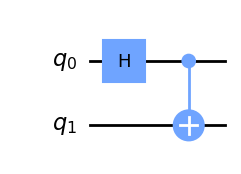

<IPython.core.display.Latex object>

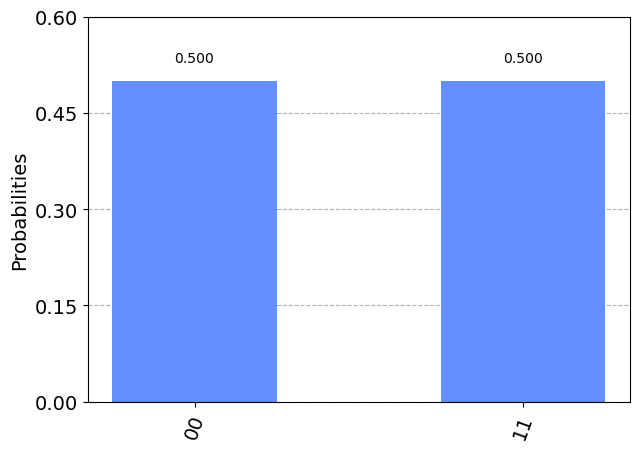

In [7]:
qc = QuantumCircuit(2)
qc.h(0)     # q0 = H(|0>)
qc.cx(0, 1) # q1 = XOR(q1, q0)
display(qc.draw('mpl'))

qc.save_statevector()
result = simulator.run(qc).result()
final_state = result.get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))

plot_histogram(result.get_counts())

### Algorítmos??

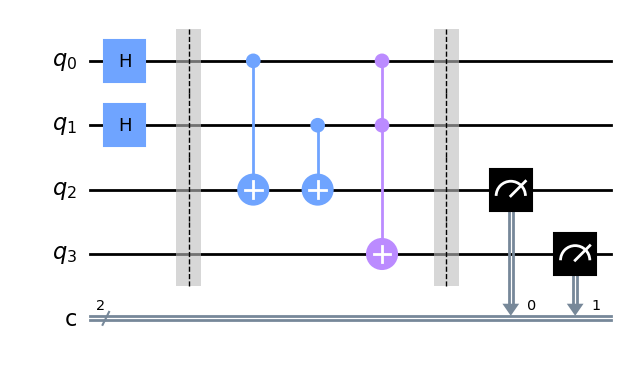

In [8]:
# Add 2 "random" numbers
adder = QuantumCircuit(4, 2)
adder.h(0)         # q0 = H(|0>)
adder.h(1)         # q1 = H(|0>)
adder.barrier()
adder.cx(0, 2)     # q2 = XOR(q0, q2)
adder.cx(1, 2)     # q2 = XOR(q1, q2)
adder.ccx(0, 1, 3) # q3 = AND(q0, q1)
adder.barrier()
adder.measure(2, 0)
adder.measure(3, 1)
adder.draw('mpl')

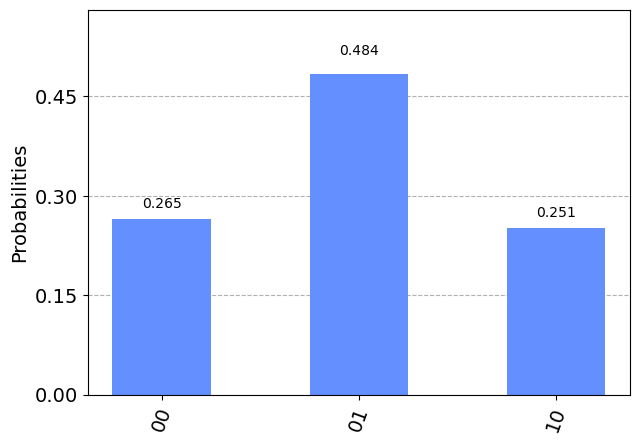

In [9]:
counts = simulator.run(adder).result().get_counts()
plot_histogram(counts)

Além de gerar números aleatórios sem utilizar as décadas de pesquisa sobre PRNGs, a mecânica quântica tem algum outro uso?  
Eu não estaria aqui se não tivesse 🙃  
Alguns algorítmos *determinísticos* levam tempo exponencial enquanto sua versão quântica leva tempo polinomial

### Deutsch–Jozsa algorithm

O algoritmo que vamos ver agora se chama Deutsch–Jozsa algorithm, e é a versão quântica de um algoritmo que checa se uma função $f \colon \{ 0, 1 \}^n \mapsto \{ 0, 1 \}$ é constante ou *balanceada*.
Pode parecer uma tarefa fácil, mas para termos $100 \%$ de certeza no pior caso teremos que fazer $2^{n-1} + 1$ *evaluations* de $f$, enquanto precisamos de apenas $1$ com o algorítmo de Deutsch–Jozsa.

In [10]:
from random import getrandbits
from numpy.random import randint

Mas antes, outro resultado contraintuitivo:

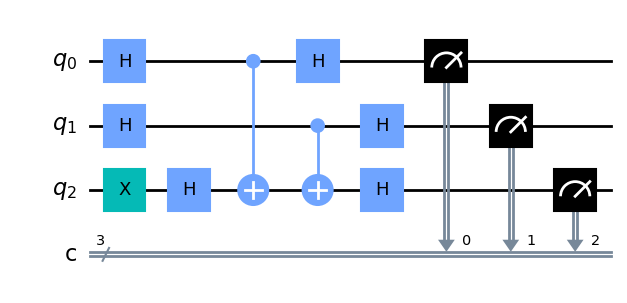

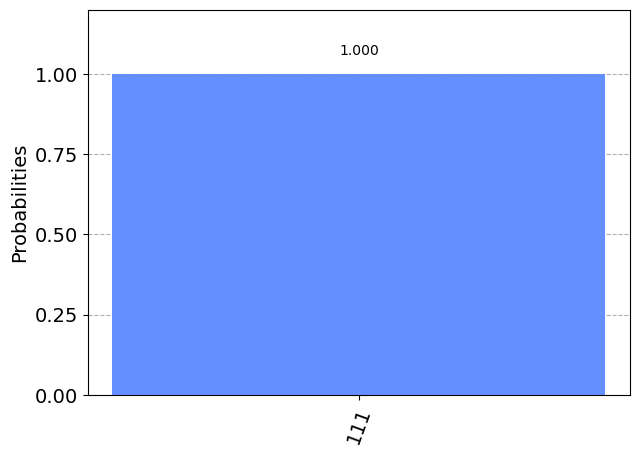

In [11]:
hcx_qc = QuantumCircuit(3, 3)

hcx_qc.x(2)     # q2 = |1>)

hcx_qc.h(0)     # q0 = H(q0)
hcx_qc.h(1)     # q1 = H(q1)
hcx_qc.h(2)     # q2 = H(q2)

# Note that appling the X gate after the H gate has no effect
# in the immediate measurements
hcx_qc.cx(0, 2) # q2 = XOR(q2, q0)
hcx_qc.cx(1, 2) # q2 = XOR(q2, q1)

hcx_qc.h(0)     # q0 = H(q0)
hcx_qc.h(1)     # q1 = H(q1)
hcx_qc.h(2)     # q2 = H(q2)

hcx_qc.measure(0, 0)
hcx_qc.measure(1, 1)
hcx_qc.measure(2, 2)

display(hcx_qc.draw('mpl'))

counts = simulator.run(hcx_qc).result().get_counts()
plot_histogram(counts)

In [12]:
# n is the numbers of inputs of the circuit
def constant_f(n):
    # n inputs and 1 output
    f_qc = QuantumCircuit(n + 1)

    if getrandbits(1) == 1:
        f_qc.x(n) # qn = NOT(qn)

    f_gate = f_qc.to_gate()
    f_gate.name = "f"
    return f_gate

def balanced_f(n):
    f_qc = QuantumCircuit(n + 1)

    mask = randint(1, 2**n)
    # Format the mask as a string of digits, padded with 0s
    mask_str = format(mask, f"0{n}b")
    
    for qubit, value in enumerate(mask_str):
        if value == '1':
            f_qc.x(qubit) # qq = NOT(qq)
        # Here the magic happens
        f_qc.cx(qubit, n) # qn = XOR(qn, qq)
        
        # Undo the not gates
        if value == '1':
            f_qc.x(qubit) # qq = NOT(qq)

    f_gate = f_qc.to_gate()
    f_gate.name = "f"
    return f_gate

In [13]:
def deutsch_jozsa(f, n):
    qc = QuantumCircuit(n + 1, n)

    # Set up the output quibit
    qc.x(n)         # qn = |1>
    
    # Apply the Hadamard operation to all qubits
    for qubit in range(n + 1):
        qc.h(qubit) # qq = H(qq)
    
    # Add f to the circuit
    qc.append(f(n), range(n + 1))
    
    # Apply the Hadamard operation again and measure
    for qubit in range(n):
        qc.h(qubit) # qq = H(qq)
        qc.measure(qubit, qubit)

    return qc

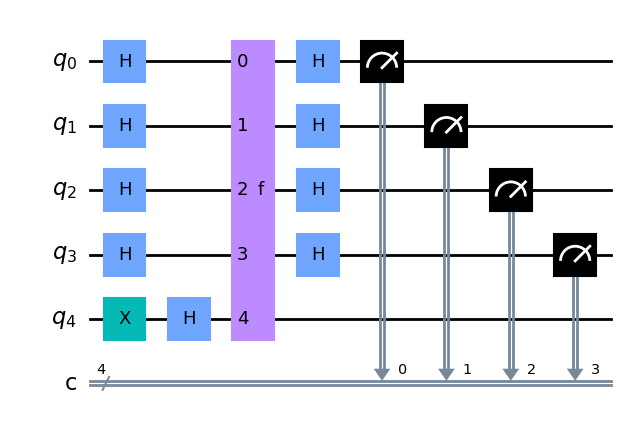

Constant function:


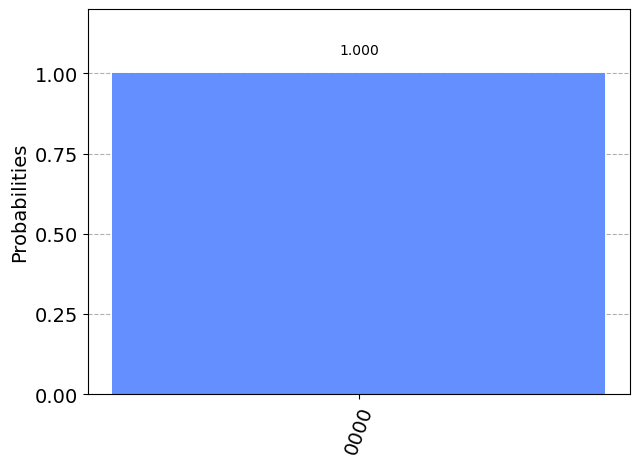

Balanced function:


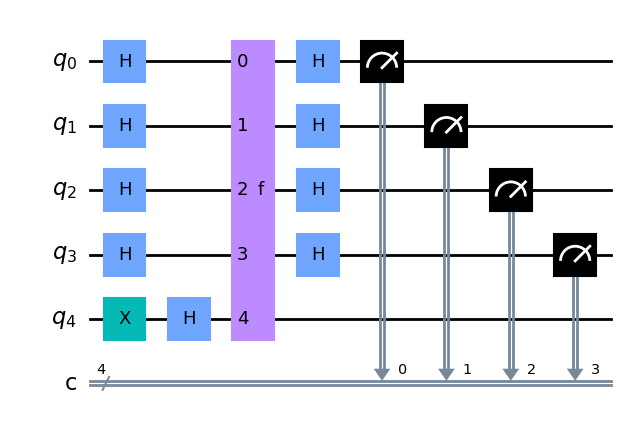

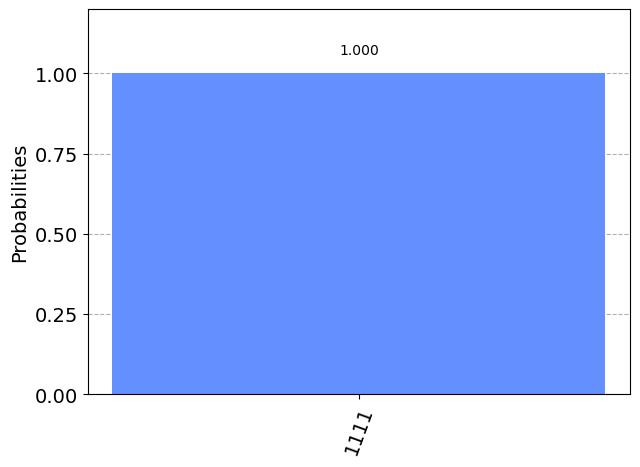

In [14]:
n = 4

# The circuit looks the same for both constant and balanced funcions
qc = deutsch_jozsa(constant_f, n)
display(qc.draw('mpl'))

print("Constant function:")
circuit = assemble(transpile(qc, simulator))
counts = simulator.run(circuit).result().get_counts()
display(plot_histogram(counts))

print("Balanced function:")
qc = deutsch_jozsa(balanced_f, n)
circuit = assemble(transpile(qc, simulator))
counts = simulator.run(circuit).result().get_counts()
display(qc.draw('mpl'))
display(plot_histogram(counts))